<a href="https://colab.research.google.com/github/Ecaballero333/Obligatorio_ML/blob/develop/VallarinoIgnacio_CaballeroEduardo_Obligatorio_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obligatorio



In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [56]:
from google.colab import files 


uploaded = files.upload()

Saving nuevo_dataset.csv to nuevo_dataset (2).csv


In [57]:
df=pd.read_csv("nuevo_dataset.csv", sep = ",")

## Funciones


In [58]:
def evaluateAccuracy(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print(f"ACCURACY TRAIN: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"ACCURACY TEST: {accuracy_score(y_test, y_test_pred):.4f}")
    print("\n")
    

## Análisis exploratorio

In [59]:
df.head(100)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,79510,Female,22,1,19.0,1,< 1 Year,No,54559.0,152.0,87,0
1,186555,Male,57,1,18.0,0,1-2 Year,Yes,33439.0,124.0,63,0
2,158037,Female,64,1,28.0,0,1-2 Year,Yes,39327.0,122.0,45,0
3,343706,Male,52,1,41.0,1,1-2 Year,No,26536.0,124.0,161,0
4,137903,Female,21,1,7.0,0,< 1 Year,No,28416.0,152.0,92,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,196823,Male,51,1,28.0,0,1-2 Year,Yes,54154.0,26.0,272,0
96,293262,Male,35,1,46.0,0,1-2 Year,No,22241.0,154.0,267,0
97,260666,Male,24,1,14.0,1,< 1 Year,No,16288.0,152.0,236,0
98,14316,Female,23,1,13.0,1,< 1 Year,No,28760.0,152.0,166,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93891 entries, 0 to 93890
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    93891 non-null  int64  
 1   Gender                93891 non-null  object 
 2   Age                   93891 non-null  int64  
 3   Driving_License       93891 non-null  int64  
 4   Region_Code           93891 non-null  float64
 5   Previously_Insured    93891 non-null  int64  
 6   Vehicle_Age           93891 non-null  object 
 7   Vehicle_Damage        93891 non-null  object 
 8   Annual_Premium        93891 non-null  float64
 9   Policy_Sales_Channel  93891 non-null  float64
 10  Vintage               93891 non-null  int64  
 11  Response              93891 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 8.6+ MB


### Convertir Variables

In [73]:
# Conversión variable categórica
df['Driving_License'] = df['Driving_License'].astype('str')
df['Previously_Insured'] = df['Previously_Insured'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93891 entries, 0 to 93890
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        93891 non-null  int64  
 1   Gender                    93891 non-null  object 
 2   Age                       93891 non-null  int64  
 3   Driving_License           93891 non-null  object 
 4   Region_Code               93891 non-null  float64
 5   Previously_Insured        93891 non-null  object 
 6   Vehicle_Age               93891 non-null  object 
 7   Vehicle_Damage            93891 non-null  object 
 8   Annual_Premium            93891 non-null  float64
 9   Policy_Sales_Channel      93891 non-null  float64
 10  Vintage                   93891 non-null  int64  
 11  Response                  93891 non-null  int64  
 12  AgeWinzorized             93891 non-null  int64  
 13  Annual_PremiumWinzorized  93891 non-null  float64
dtypes: flo

Variables que están definidas como número pero son categoricas:
* Driving_License: valores posibles -> 0 y 1
* Previously_Insured: valores posibles -> 0 y 1
* Response: Es el target. Valores posibles -> 0 y 1

Las pasamos a string (excepto "response") en un primer lugar para poder hacerlas Dummy y luego poder usarlas en analisis de correlacion. 

In [61]:
# Creacion de dummies para variables categoricas.
dfDummy = pd.get_dummies(df, drop_first = True)
dfDummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93891 entries, 0 to 93890
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     93891 non-null  int64  
 1   Age                    93891 non-null  int64  
 2   Driving_License        93891 non-null  int64  
 3   Region_Code            93891 non-null  float64
 4   Previously_Insured     93891 non-null  int64  
 5   Annual_Premium         93891 non-null  float64
 6   Policy_Sales_Channel   93891 non-null  float64
 7   Vintage                93891 non-null  int64  
 8   Response               93891 non-null  int64  
 9   Gender_Male            93891 non-null  uint8  
 10  Vehicle_Age_< 1 Year   93891 non-null  uint8  
 11  Vehicle_Age_> 2 Years  93891 non-null  uint8  
 12  Vehicle_Damage_Yes     93891 non-null  uint8  
dtypes: float64(3), int64(6), uint8(4)
memory usage: 6.8 MB


### Outliers

In [62]:
df.describe(include = [np.number])

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000,93891.000000
mean,190515.346806,40.806520,0.998477,26.556092,0.264296,30983.086547,103.525716,154.679415,0.497492
std,109947.403429,14.368874,0.038997,12.645412,0.440960,17687.544914,55.814796,83.567929,0.499996
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95254.500000,27.000000,1.000000,16.000000,0.000000,24506.000000,26.000000,82.000000,0.000000
50%,190640.000000,41.000000,1.000000,28.000000,0.000000,32232.000000,124.000000,155.000000,0.000000
75%,285907.500000,50.000000,1.000000,34.000000,1.000000,40299.000000,152.000000,227.000000,1.000000
max,381098.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [63]:
from scipy.stats.mstats import winsorize

In [64]:
plt.figure(figsize = (3,5))
sns.set_theme(style="whitegrid")

<Figure size 216x360 with 0 Axes>

Outliers de variable Age


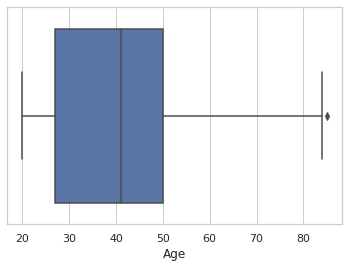

In [65]:
print('Outliers de variable Age')
sns.boxplot(x = 'Age', data = df)

Detecamos un outlier para la variable "Age". Procederemos a eliminarlo...


Outliers de variable AgeWinzorized


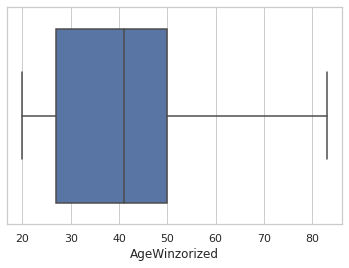

In [66]:
df['AgeWinzorized'] = winsorize(df['Age'], limits = [None, 0.0001])
print('Outliers de variable AgeWinzorized')
sns.boxplot(x = 'AgeWinzorized', data = df)

Outliers de variable Annual_Premium


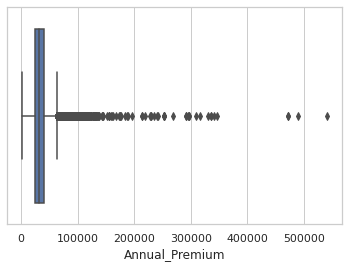

In [67]:
print('Outliers de variable Annual_Premium')
sns.boxplot(x = 'Annual_Premium', data = df)

Detectamos varios outliers para la variable "Annual_Premium". Procederemos a eliminarlos...

Outliers de variable Annual_PremiumWinzorized


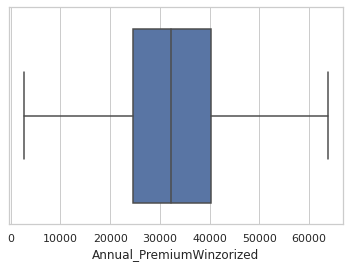

In [68]:
df['Annual_PremiumWinzorized'] = winsorize(df['Annual_Premium'], limits = [None, 0.025])
print('Outliers de variable Annual_PremiumWinzorized')
sns.boxplot(x = 'Annual_PremiumWinzorized', data = df)

Outliers de variable Vintage


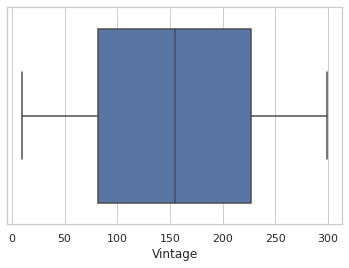

In [69]:
print('Outliers de variable Vintage')
sns.boxplot(x = 'Vintage', data = df)

### Filas repetidas

Según el reporte obtenido con pandas-profiling no hay filas repetidas

In [70]:
print("Cantidad sin borrar",len(df))
df_without_duplicates = df.drop_duplicates()
print("Cantidad con borrado", len(df_without_duplicates))


Cantidad sin borrar 93891
Cantidad con borrado 93891


### Valores nulos

No hay variables nulas.

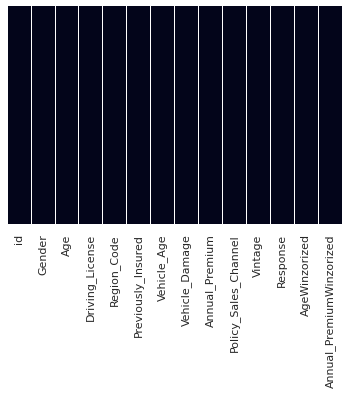

In [71]:
sns.heatmap(df.isnull(), cbar = False, yticklabels = False, xticklabels = True)

### Feature Scaling

### Análisis de correlación

#### Variables Dummy o One hot encoding para variables categóricas

####	Eliminación de variables altamente correlacionadas

Prueba de texto